In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [ ]:
import statsmodels.api as sm  #统计库

In [ ]:
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [ ]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

'''ISLP实验的包'''

In [ ]:
dir()

In [ ]:
A = np.array([3, 11, 5])
dir(A)

In [ ]:
A.sum()

In [ ]:
Boston = load_data("Boston")
Boston.columns

In [ ]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X[:4]

In [ ]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [ ]:
summarize(results)

In [ ]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

In [ ]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

In [ ]:
results.summary()

In [ ]:
results.params  #查找拟合数据

In [ ]:
new_df = pd.DataFrame({'lstat': [5, 10, 15]})
newX = design.transform(new_df)
newX

In [ ]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

In [ ]:
new_predictions.conf_int(obs=True, alpha=0.5)

In [ ]:
def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

In [ ]:
'''**kwargs 允许函数接受任意数量的关键字参数，这些参数会以字典的形式传入函数内部。'''
'''*args 允许函数接受任意数量的位置参数，这些参数会以元组的形式传入函数内部。'''
'''*args 和 **kwargs 都是python中的可变参数。'''

In [ ]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
       results.params.iloc[0],  #pandas新版用iloc索引
       results.params.iloc[1],
       'r--',  #红色 --线
       linewidth=3)

In [ ]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')  #添加一条黑色虚线

In [ ]:
infl = results.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)  #杠杆统计 算帽子矩阵对角 得出杠杆点
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [ ]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

In [ ]:
terms = Boston.columns.drop('medv')
terms

In [ ]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

In [ ]:
minus_age = Boston.columns.drop('medv', 'age')
Xma = MS(minus_age).fit_transform(Boston)
summarize(sm.OLS(y, Xma).fit())

In [124]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]  #列表推导式
vif = pd.DataFrame({'vif': vals},
                   index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [ ]:
vals = []
for i in range(1, X.shape[1]):
    vals.append(VIF(X, i))

In [126]:
X = MS(['lstat',
        'age',
        ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [127]:
X = MS([poly('lstat', degree=2),  #添加多项式
        'age']).fit_transform(Boston)
models3 = sm.OLS(y, X)
results3 = models3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [128]:
anova_lm(results1, results3)  #方差分析

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


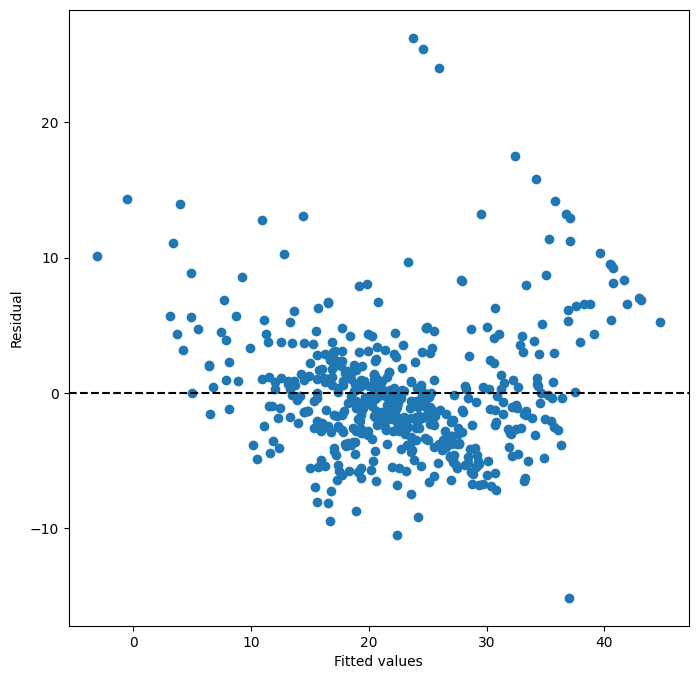

In [129]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

In [130]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [133]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
                   ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288
